In [2]:
from __future__ import print_function, absolute_import

import os
from utils_registrationVNC_2507 import *

In [3]:
"""
This script is made to simulate the registration in 3D uisng the elastix toolbox of VNC to TNC and their corresponding masks for tht, REP4_VNC are going to 
simulate TNC images and their calcifications are extracted using simple thresholds (130HU and 0.5mm2 to avoid noise inclusion) and REP1_VNC as VNC images. 
The images are cropped focusing only in the artery and not normalized.
Images of same velocity and standard/MCR category are aligned between each repetition, but each standard/MCR category is not aligned.
"""

'\nThis script is made to simulate the registration in 3D uisng the elastix toolbox of VNC to TNC and their corresponding masks for tht, REP4_VNC are going to \nsimulate TNC images and their calcifications are extracted using simple thresholds (130HU and 0.5mm2 to avoid noise inclusion) and REP1_VNC as VNC images. \nThe images are cropped focusing only in the artery and not normalized.\nImages of same velocity and standard/MCR category are aligned between each repetition, but each standard/MCR category is not aligned.\n'

In [4]:
# Initial settings
save_dicom_as_mhd = False
create_calcification_masks = True
plot_results_registration = True


# Determine folders where your images are stored
TNC_images_folder_path = r'D:\CT\FULLDOSE\REP4'
VNC_images_folder_path = r'D:\CT\FULLDOSE\REP1'


# Determine folders to save the products for the registration process
# Main Folder for the registration process 
main_folder = r'C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507'
p_original_TNCimages_mhd = os.path.join(main_folder, 'TNC_Original_images')
p_original_VNCimages_mhd = os.path.join(main_folder, 'VNC_Original_images')
p_original_TNCMasks_mhd = os.path.join(main_folder, 'TNC_Original_masks')
p_translated_image_folder = os.path.join(main_folder, 'Translated_images')
p_final_images_folder = os.path.join(main_folder, 'Final_images')
p_registeredimages_and_masks_folder = os.path.join(main_folder, 'Data_for_model')

p_results_folder = os.path.join(main_folder, 'results_registration_prue')
p_parameters_folder = os.path.join(main_folder, 'Parameters_files_prue')

All_folders = [p_registeredimages_and_masks_folder, p_original_TNCimages_mhd, p_original_VNCimages_mhd, p_original_TNCMasks_mhd, p_translated_image_folder, p_final_images_folder, p_results_folder, p_parameters_folder]
# Check if all directories exist and make them if not
for folder in All_folders:
    if os.path.exists(folder) is False:
        os.mkdir(folder)


# ELASTIX
# Set the path to elastix
path_to_elastix = r'C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder'
# Initialise elastix toolbox
ELASTIX_PATH, TRANSFORMIX_PATH = initialise_elastix(path_to_elastix)


# Create a list for the parameter files
parameter_files = [file for file in os.listdir(p_parameters_folder) if not file.startswith('R')]


# Other settings
winsorization_limit = [0.00, 0.01] 

In [5]:
# IF the images are in DICOM format, save them as MHD for registration. Otherwise, just load them into an array
if save_dicom_as_mhd:
    TNC_images_mhd, pixel_size = retrieve_all_Dicomimages(TNC_images_folder_path, p_original_TNCimages_mhd, winsorization_limit)    
    VNC_images_mhd, pixel_size = retrieve_all_Dicomimages(VNC_images_folder_path, p_original_VNCimages_mhd, winsorization_limit)
else:
    TNC_images_mhd, pixel_size = retrieve_all_MHDimages(p_original_TNCimages_mhd)
    VNC_images_mhd, pixel_size = retrieve_all_MHDimages(p_original_VNCimages_mhd)
    

Loading... C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\0mms_VNCREP4.mhd
Loading... C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\0mms_VNC_MCR_REP4.mhd
Loading... C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\10mms_VNCREP4.mhd
Loading... C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\10mms_VNC_MCR_REP4.mhd
Loading... C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\20mms_VNCREP4.mhd
Loading... C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\20mms_VNC_MCR_REP4.mhd
Loading... C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\30mms_VNCREP4.mhd
Loading... C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\30mms

In [6]:
# If the TNC calcifications have not been segmented yet, do it using an intensity threshold of 130 HU and area threshold of 0.5 mm2
# Save the masks as mhd files in a separate folder
# If the masks are already created, just load them into an array
if create_calcification_masks:

    # initialize vector to store the masks
    TNC_masks_mhd = []
    for image_name, image_array in TNC_images_mhd:
        calcification = calcification_detection(image_array, 130, pixel_size)
        output_calcificationmask_file =os.path.join(p_original_TNCMasks_mhd, image_name + '.mhd')

        # Convert calcification mask array to image
        calcification_image = sitk.GetImageFromArray(calcification)
        calcification_image.SetOrigin((0, 0, 0))  # Set origin if necessary
        calcification_image.SetSpacing((1, 1, 1))  # Set spacing if necessary

        # write the image to the file
        sitk.WriteImage(calcification_image,output_calcificationmask_file)

        # Append calcification mask to a list
        TNC_masks_mhd.append((image_name, calcification))
else:
    TNC_masks_mhd, pixel_size = retrieve_all_MHDimages(p_original_TNCMasks_mhd)


Processing image : 0mms_VNCREP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\0mms_VNCREP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\0mms_VNCREP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\0mms_VNCREP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\0mms_VNCREP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue\Par_affine_prueba.txt


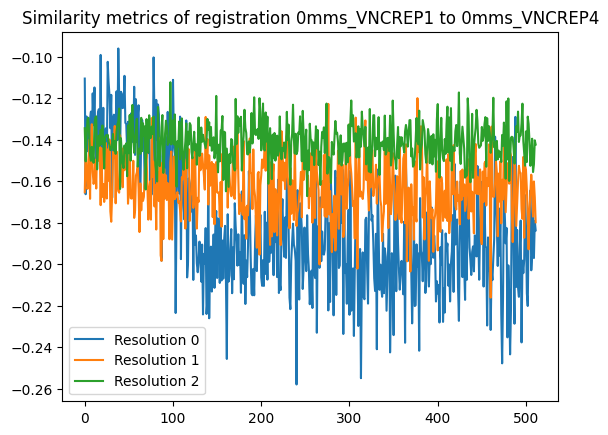

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 0mms_VNCREP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\0mms_VNCREP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\0mms_VNCREP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\0mms_VNCREP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\0mms_VNCREP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue\Par_bspline_prueba.txt


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 0mms_VNC_MCR_REP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\0mms_VNC_MCR_REP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\0mms_VNC_MCR_REP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\0mms_VNC_MCR_REP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\0mms_VNC_MCR_REP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue\Pa

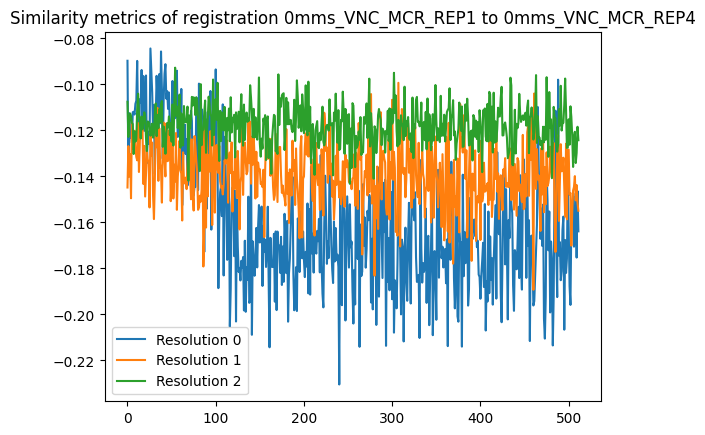

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 0mms_VNC_MCR_REP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\0mms_VNC_MCR_REP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\0mms_VNC_MCR_REP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\0mms_VNC_MCR_REP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\0mms_VNC_MCR_REP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue\Par_

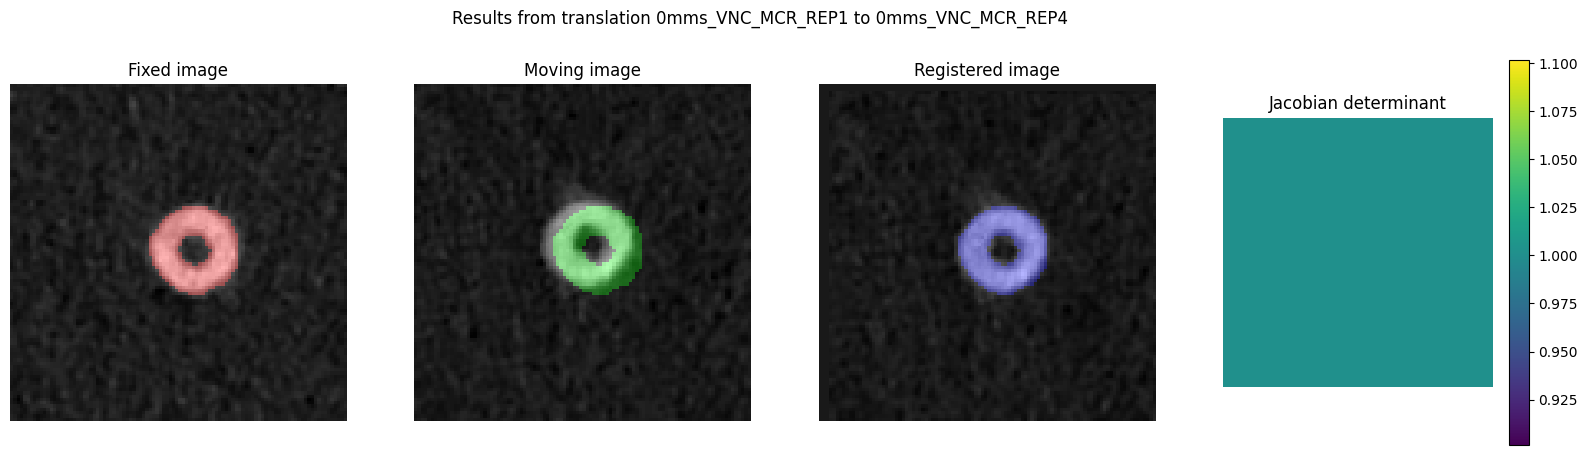

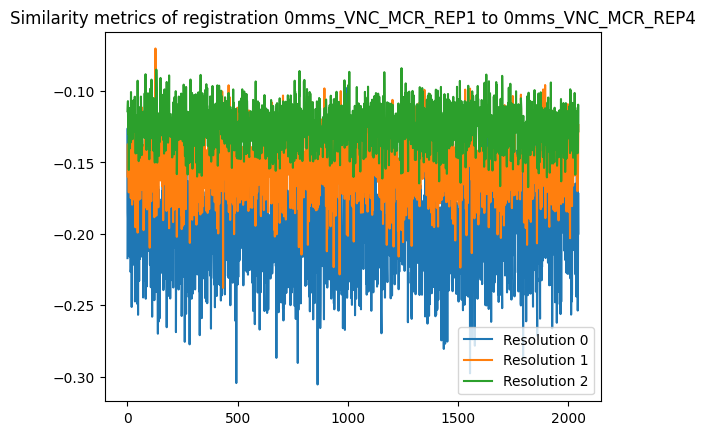

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 10mms_VNCREP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\10mms_VNCREP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\10mms_VNCREP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\10mms_VNCREP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\10mms_VNCREP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue\Par_affine_prueba.txt


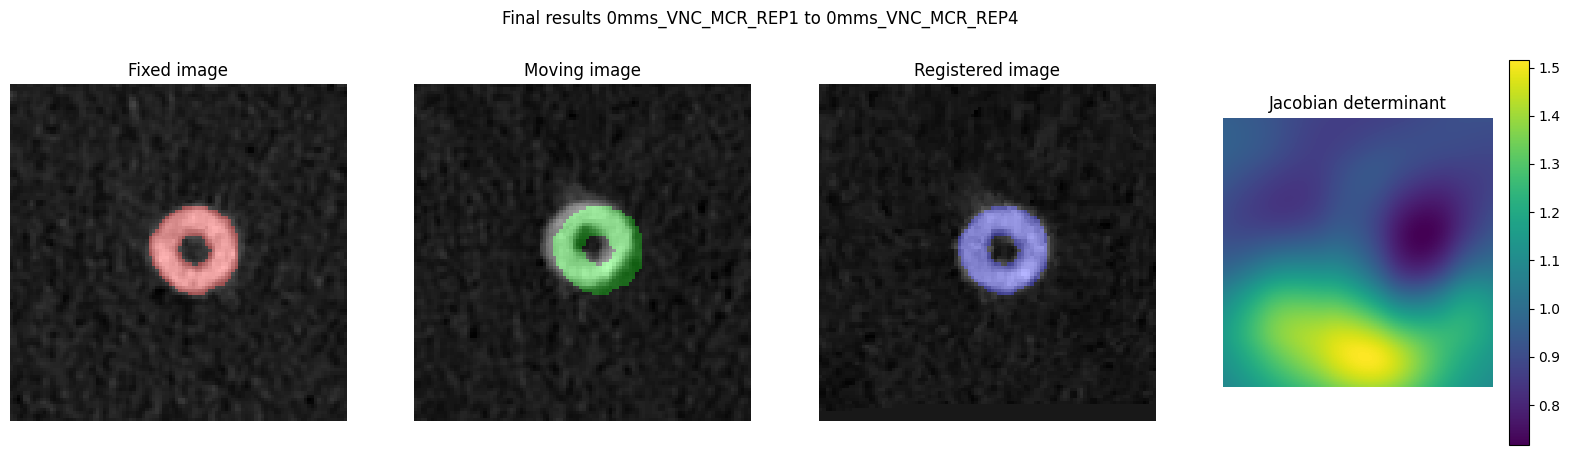

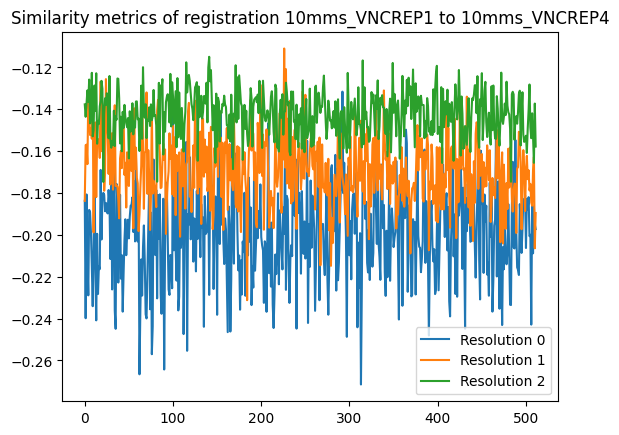

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 10mms_VNCREP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\10mms_VNCREP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\10mms_VNCREP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\10mms_VNCREP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\10mms_VNCREP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue\Par_bspline_prueba.txt


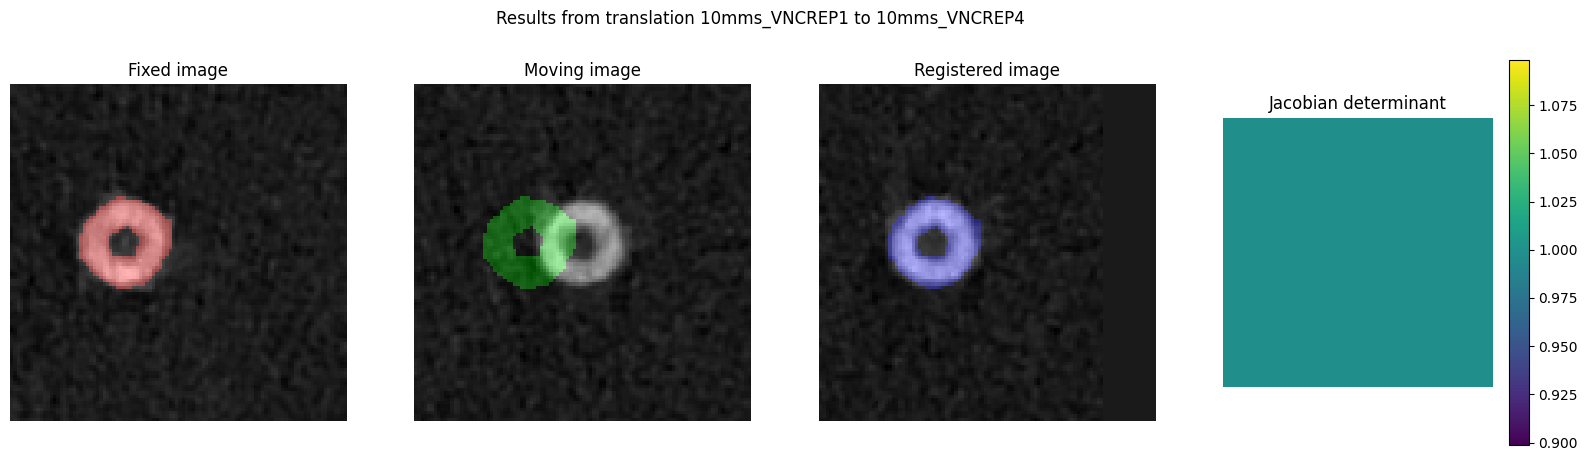

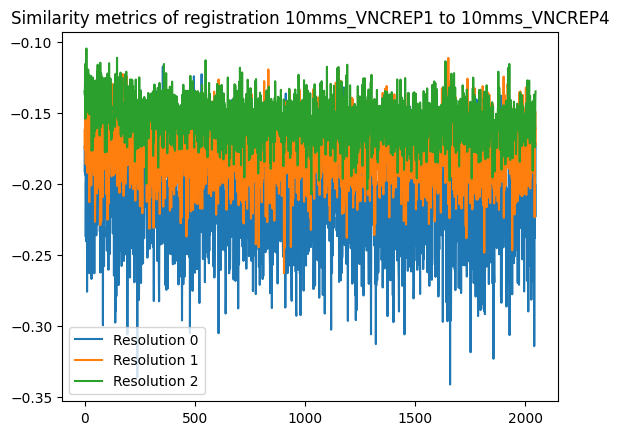

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 10mms_VNC_MCR_REP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\10mms_VNC_MCR_REP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\10mms_VNC_MCR_REP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\10mms_VNC_MCR_REP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\10mms_VNC_MCR_REP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_pr

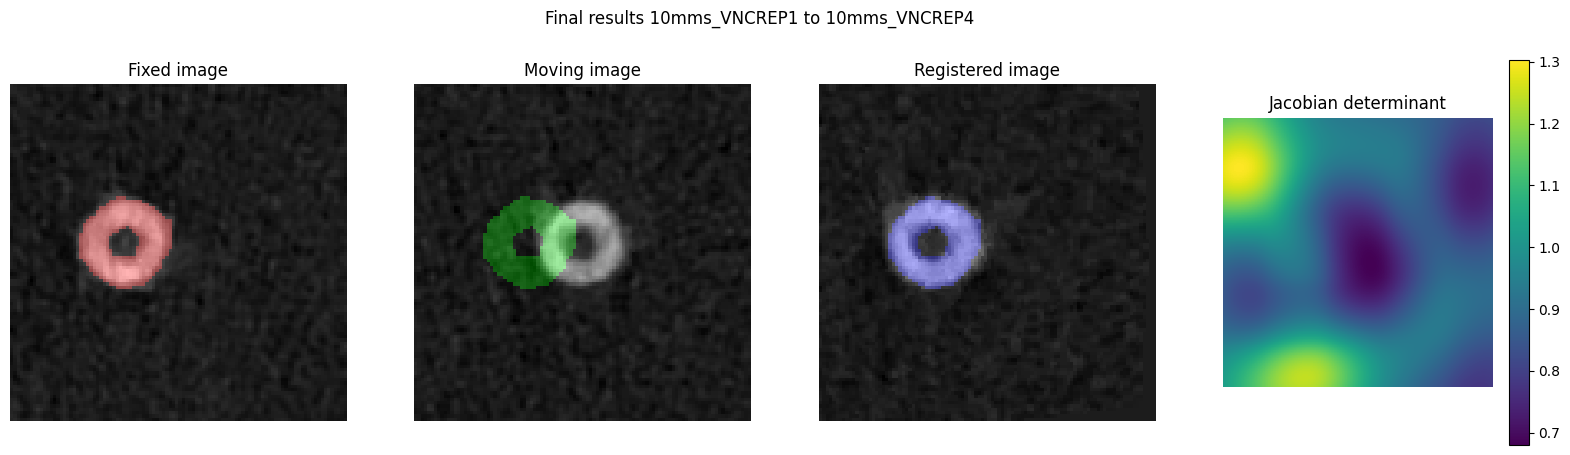

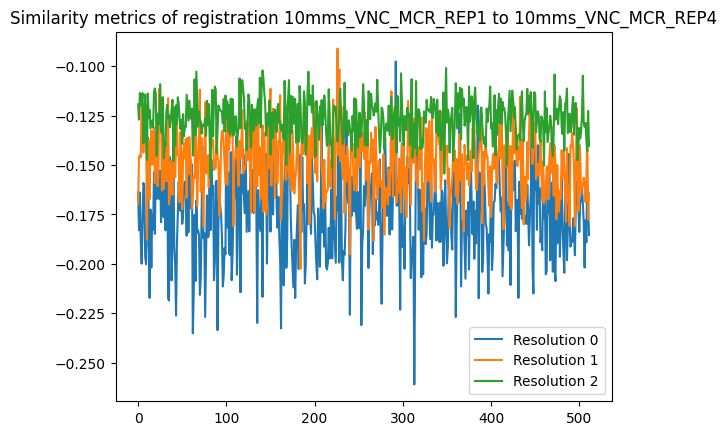

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 10mms_VNC_MCR_REP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\10mms_VNC_MCR_REP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\10mms_VNC_MCR_REP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\10mms_VNC_MCR_REP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\10mms_VNC_MCR_REP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 20mms_VNCREP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\20mms_VNCREP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\20mms_VNCREP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\20mms_VNCREP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\20mms_VNCREP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue\Par_affine_prueba.txt


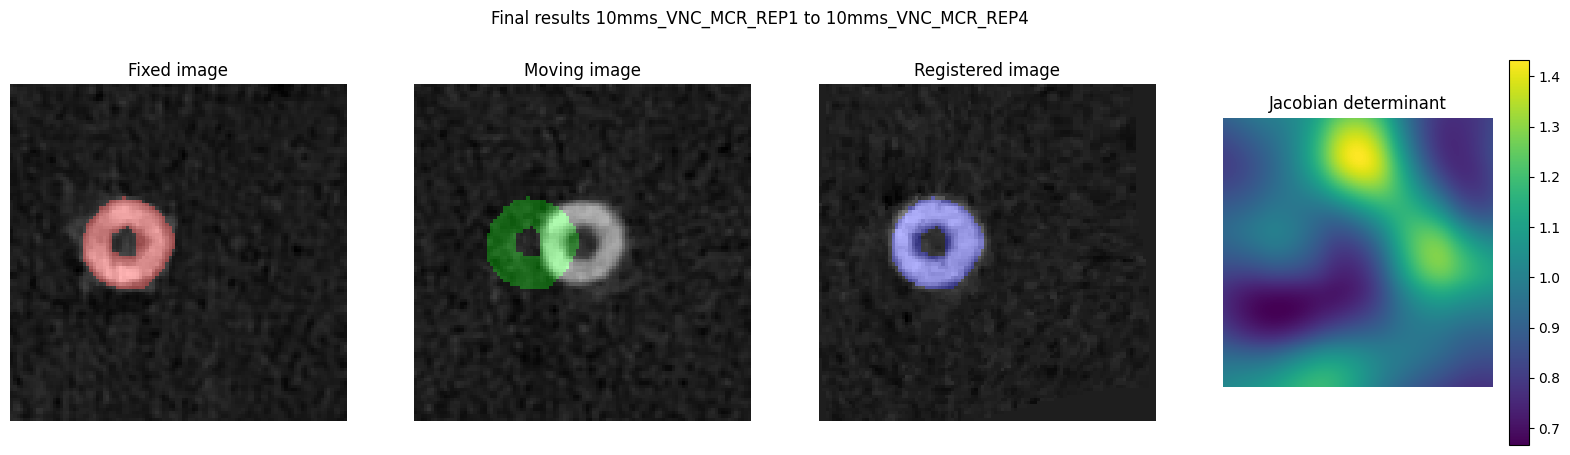

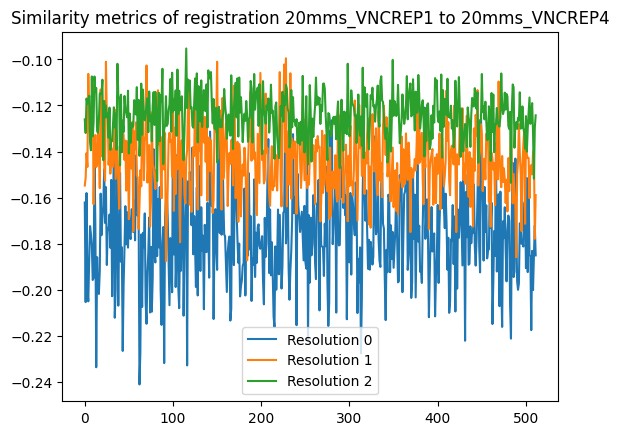

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 20mms_VNCREP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\20mms_VNCREP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\20mms_VNCREP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\20mms_VNCREP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\20mms_VNCREP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue\Par_bspline_prueba.txt


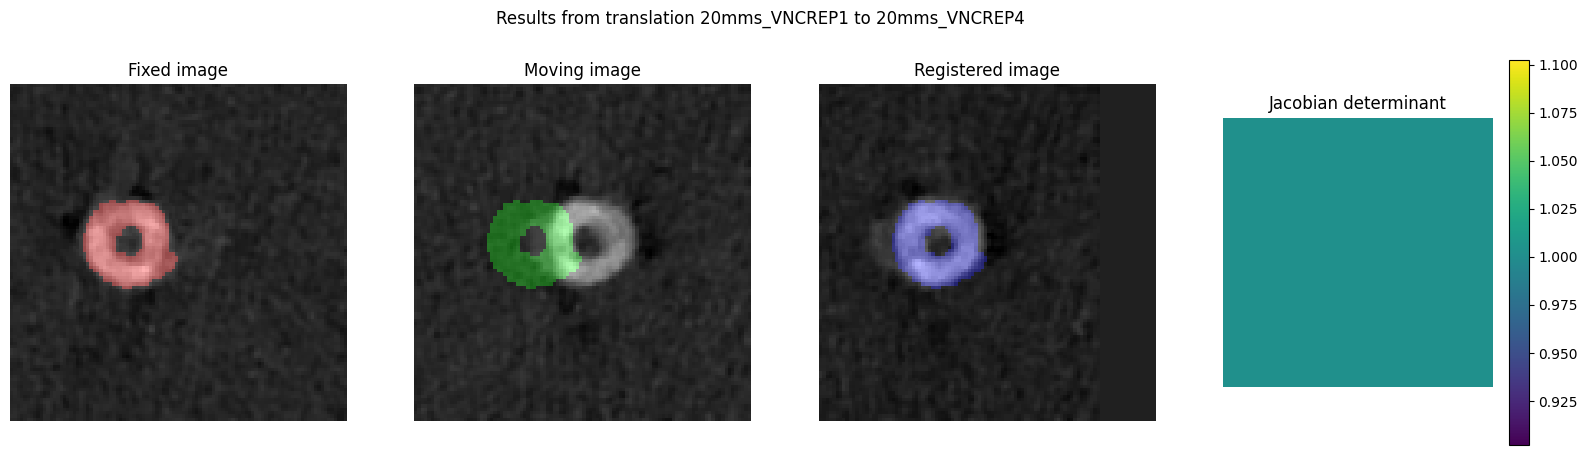

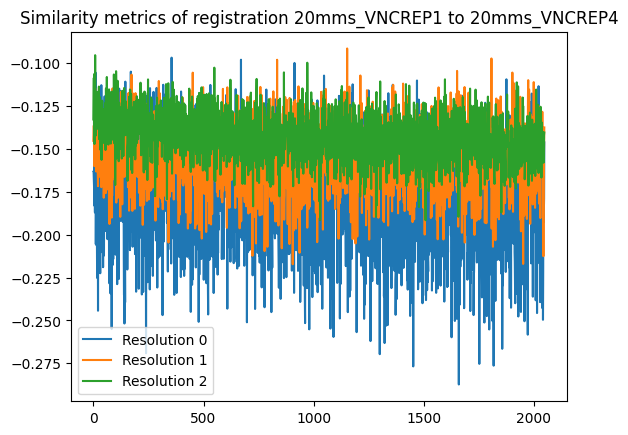

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 20mms_VNC_MCR_REP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\20mms_VNC_MCR_REP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\20mms_VNC_MCR_REP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\20mms_VNC_MCR_REP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\20mms_VNC_MCR_REP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_pr

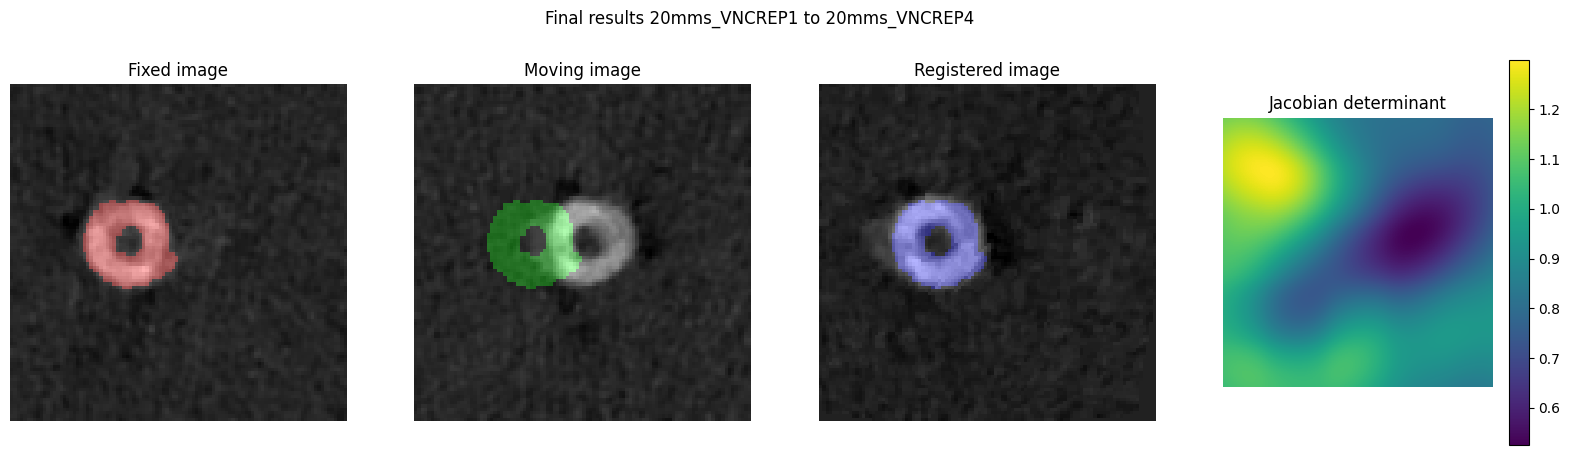

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 20mms_VNC_MCR_REP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\20mms_VNC_MCR_REP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\20mms_VNC_MCR_REP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\20mms_VNC_MCR_REP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\20mms_VNC_MCR_REP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue

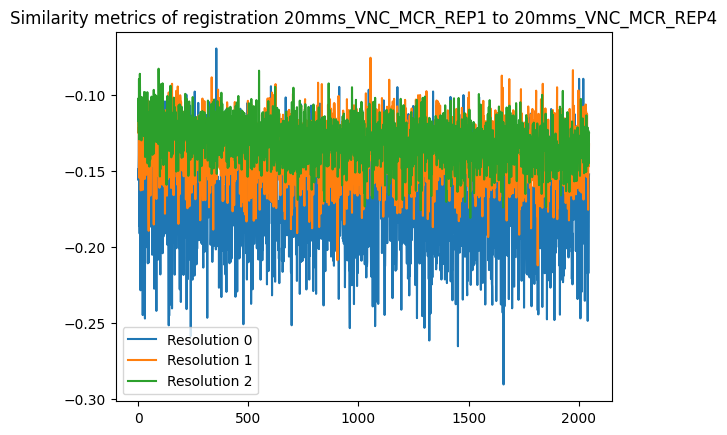

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 30mms_VNCREP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\30mms_VNCREP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\30mms_VNCREP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\30mms_VNCREP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\30mms_VNCREP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue\Par_affine_prueba.txt


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 30mms_VNCREP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\30mms_VNCREP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\30mms_VNCREP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\30mms_VNCREP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\30mms_VNCREP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue\Par_bspline_prueba.txt


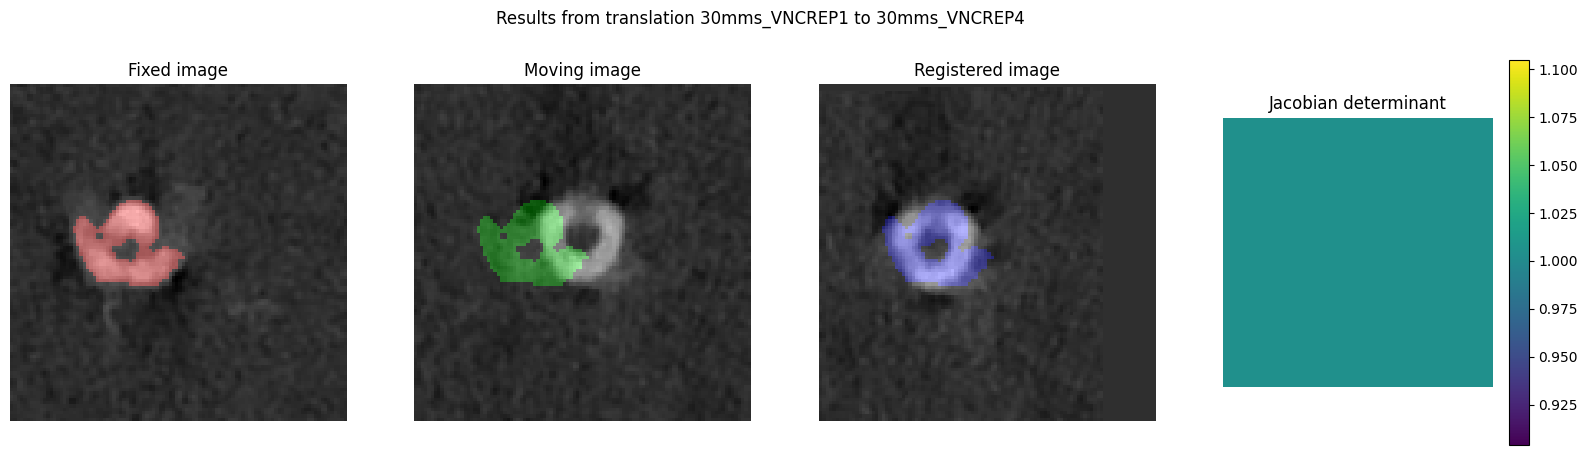

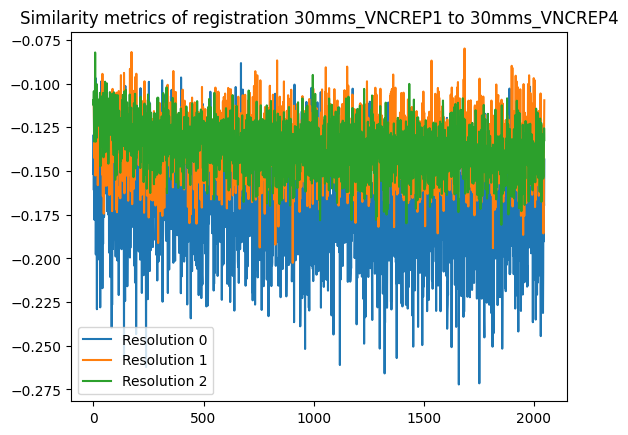

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 30mms_VNC_MCR_REP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\30mms_VNC_MCR_REP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\30mms_VNC_MCR_REP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\30mms_VNC_MCR_REP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\30mms_VNC_MCR_REP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_pr

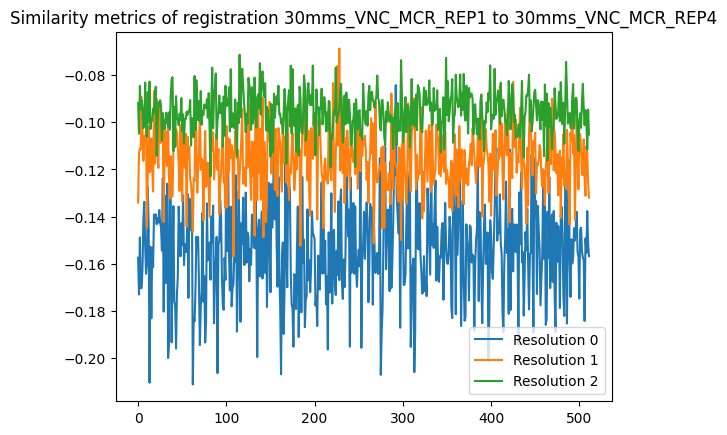

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 30mms_VNC_MCR_REP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\30mms_VNC_MCR_REP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\30mms_VNC_MCR_REP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\30mms_VNC_MCR_REP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\30mms_VNC_MCR_REP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue

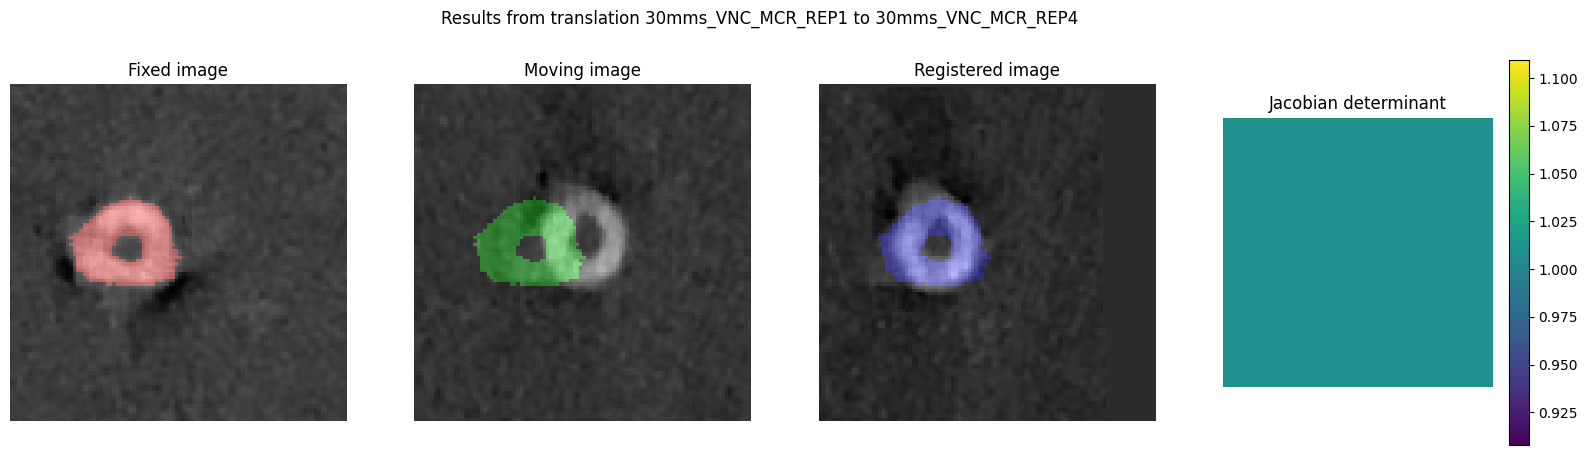

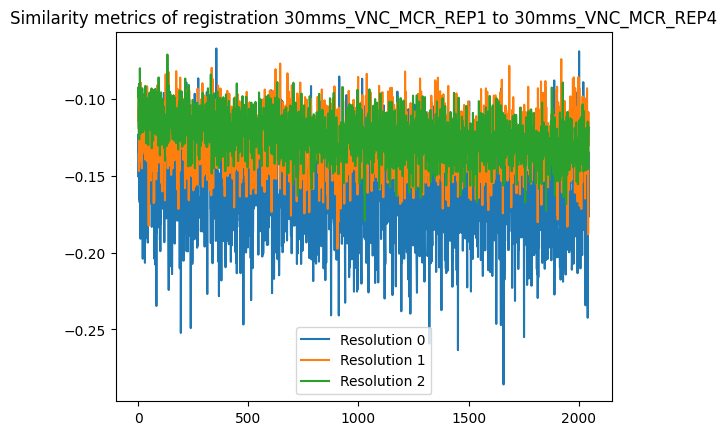

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 40mms_VNCREP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\40mms_VNCREP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\40mms_VNCREP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\40mms_VNCREP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\40mms_VNCREP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue\Par_affine_prueba.txt


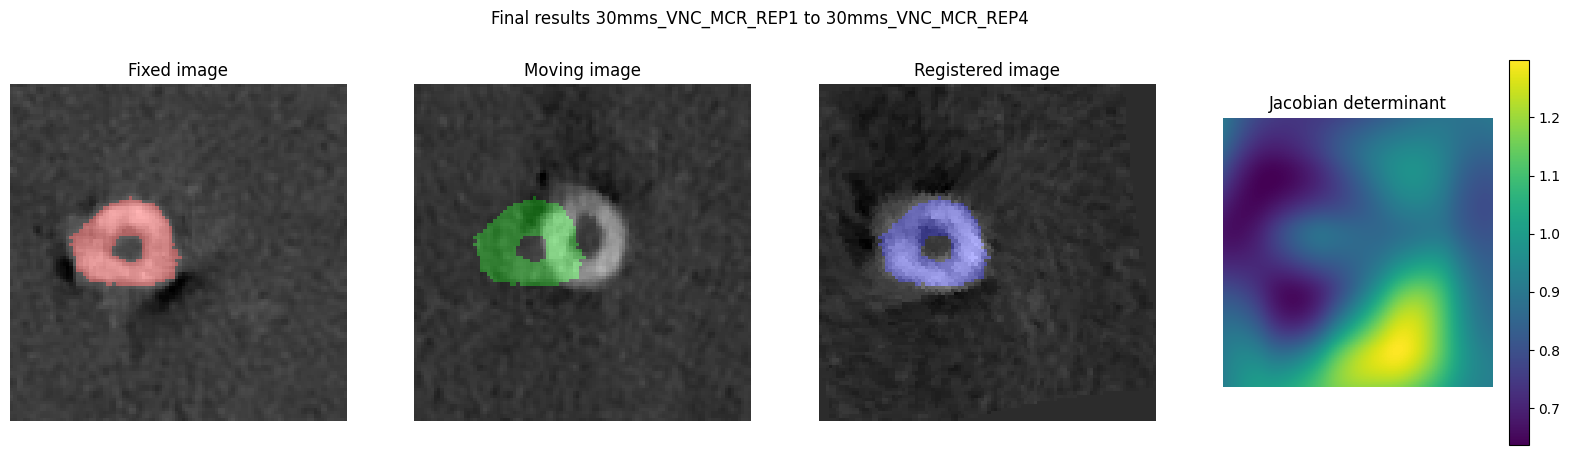

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 40mms_VNCREP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\40mms_VNCREP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\40mms_VNCREP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\40mms_VNCREP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\40mms_VNCREP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue\Par_bspline_prueba.txt


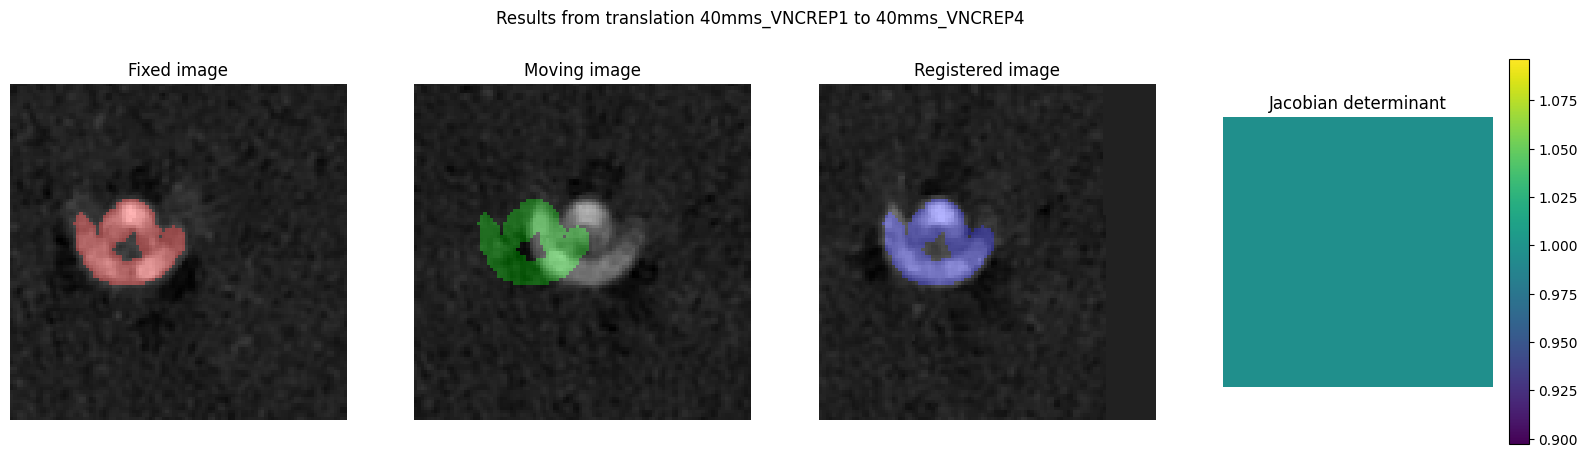

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 40mms_VNC_MCR_REP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\40mms_VNC_MCR_REP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\40mms_VNC_MCR_REP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\40mms_VNC_MCR_REP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\40mms_VNC_MCR_REP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_pr

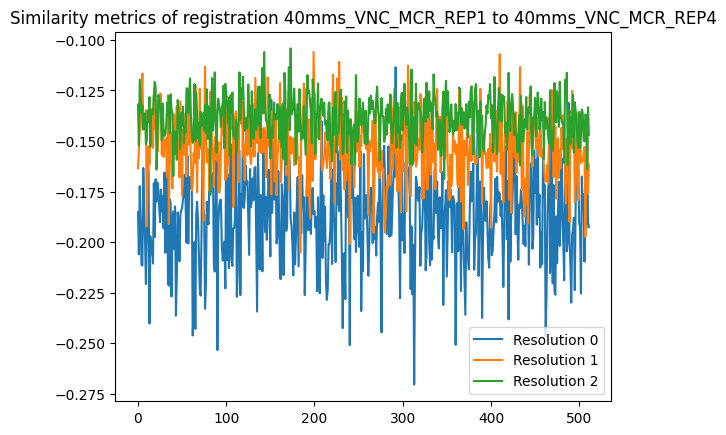

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 40mms_VNC_MCR_REP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\40mms_VNC_MCR_REP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\40mms_VNC_MCR_REP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\40mms_VNC_MCR_REP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\40mms_VNC_MCR_REP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue

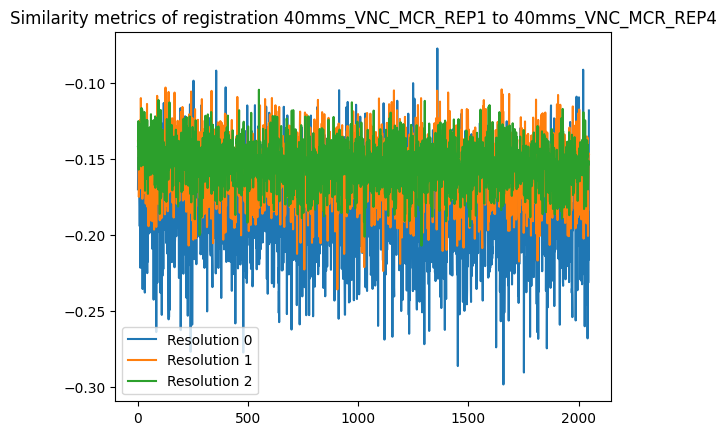

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 50mms_VNCREP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\50mms_VNCREP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\50mms_VNCREP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\50mms_VNCREP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\50mms_VNCREP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue\Par_affine_prueba.txt


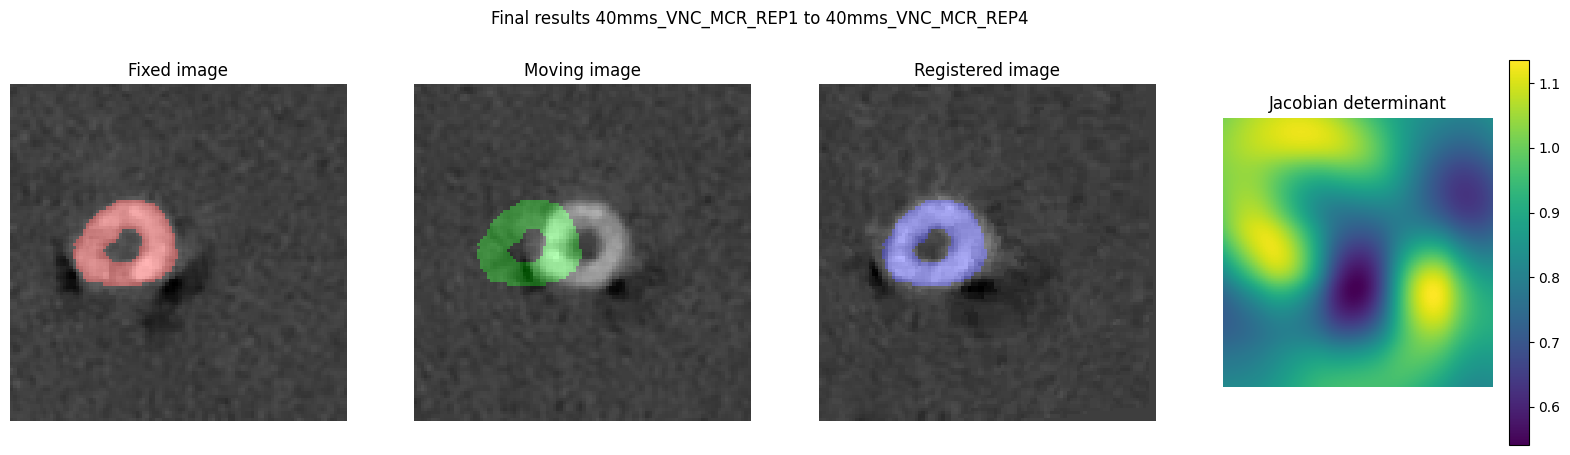

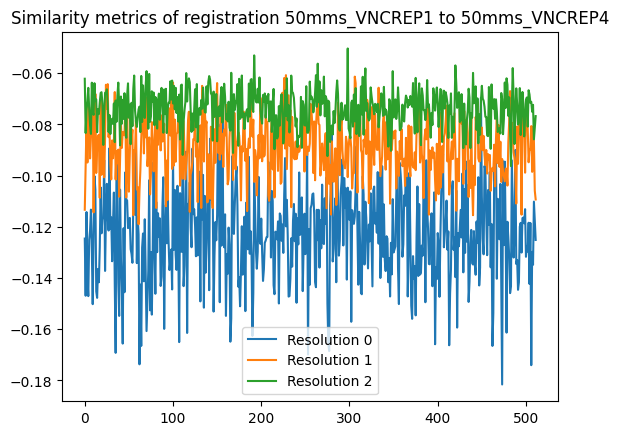

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 50mms_VNCREP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\50mms_VNCREP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\50mms_VNCREP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\50mms_VNCREP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\50mms_VNCREP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue\Par_bspline_prueba.txt


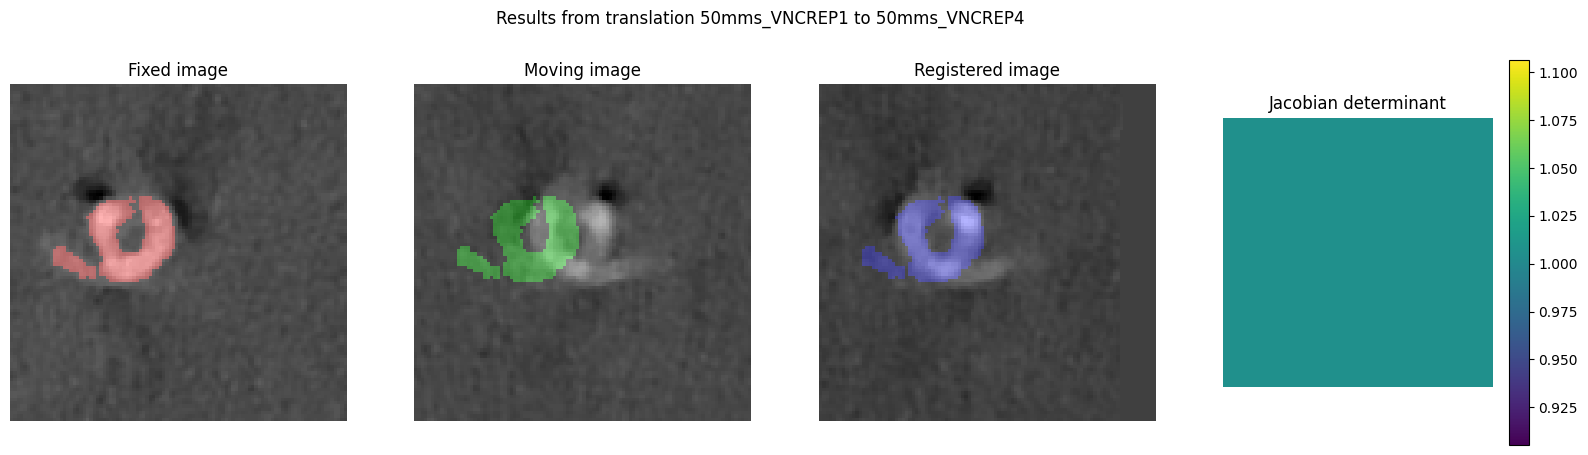

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 50mms_VNC_MCR_REP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\50mms_VNC_MCR_REP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\50mms_VNC_MCR_REP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\50mms_VNC_MCR_REP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\VNC_Original_images\50mms_VNC_MCR_REP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_affine_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_pr

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing image : 50mms_VNC_MCR_REP1
Fixed image: C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\50mms_VNC_MCR_REP4.mhd moving image:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\50mms_VNC_MCR_REP1.mhd parameters path:  C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt
C:/Users/elena/OneDrive - Universiteit Utrecht/MIX/Capita Selecta/myfolder\elastix.exe -f C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\TNC_Original_images\50mms_VNC_MCR_REP4.mhd -m C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Translated_images\50mms_VNC_MCR_REP1.mhd -p C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\Parameters_files_prue\Par_bspline_prueba.txt -out C:\Users\elena\OneDrive - Universiteit Utrecht\MIX\MR\registration_VNC_2507\results_registration_prue

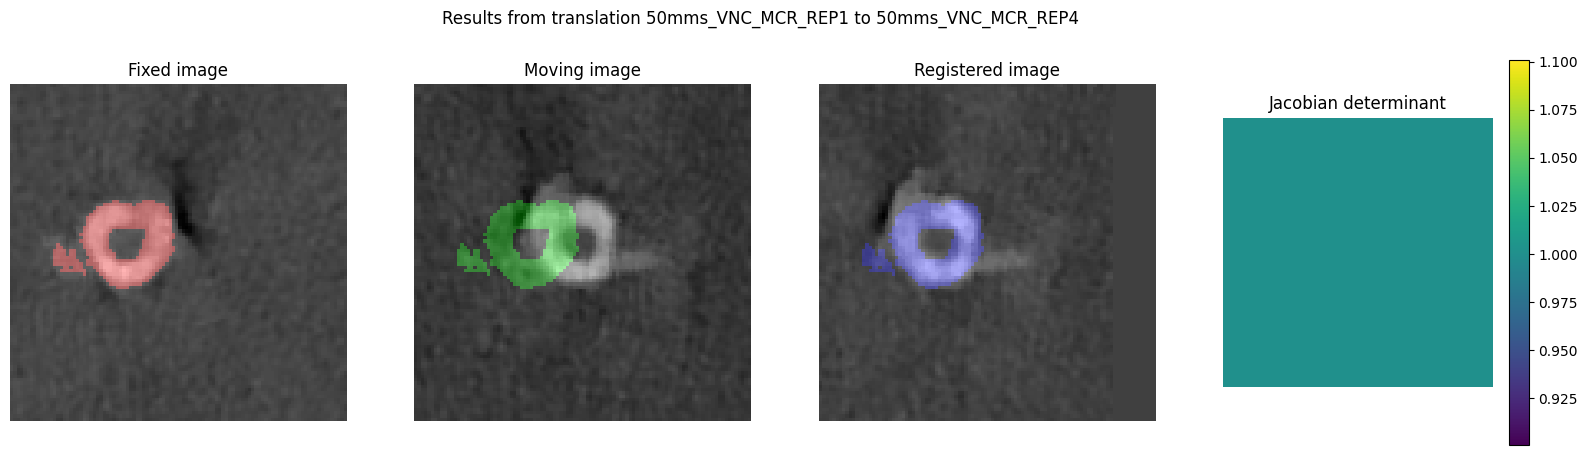

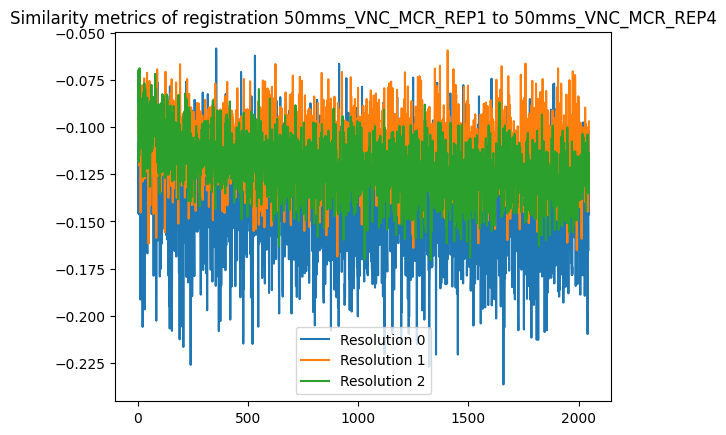

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


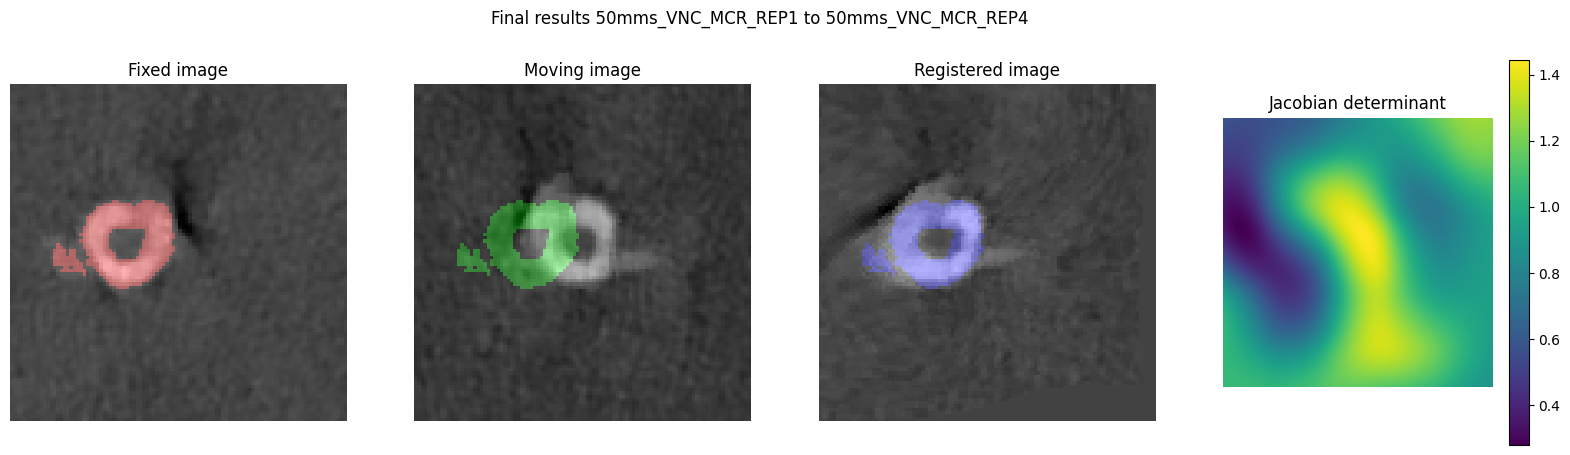

In [7]:
# Create a tensor to store in each row fixed, moving, registered and mask image according to their velocity standard/MCR category

# For that, first, create three different dictionaries to group images according to their velocity standard/MCR category (remove 4 last letter corresponding to REP and rep_number)
TNC_dict ={}
VNC_dict ={}
mask_dict ={}
# Fill TNC dictionary
for image_name, image_array in TNC_images_mhd:
    name_for_classification = image_name[:-4]
    TNC_dict[name_for_classification] = (image_name,image_array)
# Fill VNC dictionary
for image_name, image_array in VNC_images_mhd:
    name_for_classification = image_name[:-4]
    VNC_dict[name_for_classification] = (image_name,image_array)
# Fill Masks dictionary
for image_name, image_array in TNC_masks_mhd:
    name_for_classification = image_name[:-4]
    mask_dict[name_for_classification] = (image_name,image_array)


# Set tensor shape and initialize
tensor_shape =(len(TNC_images_mhd),4) + TNC_images_mhd[0][1].shape
tensor_for_classification_arrays = np.zeros(tensor_shape, dtype = np.float32)

# Fill the tensor and do registration, first affine and with the results of that, B-spline
for i, (name_for_classification, (fixed_image_name, fixed_image_array)) in enumerate(TNC_dict.items()):
    
    # Find the corresponding moving and mask image for this category
    moving_image_array = VNC_dict.get(name_for_classification)[1]
    moving_image_name =  VNC_dict.get(name_for_classification)[0]

    mask_image_array = mask_dict.get(name_for_classification)[1]
    mask_image_name = mask_dict.get(name_for_classification)[0]

    # Set the path to fixed image
    path_to_fixed_image = os.path.join(p_original_TNCimages_mhd, fixed_image_name + '.mhd')
    
    # Determine the parameter file for the registration: AFFINE REGISTRATION
    parameter_file_affine = parameter_files[0]
    affine_registered_image = align_images(moving_image_array, moving_image_name, fixed_image_array, fixed_image_name, mask_image_array, p_original_VNCimages_mhd, path_to_fixed_image, p_translated_image_folder, p_results_folder, p_parameters_folder, parameter_file_affine, ELASTIX_PATH, TRANSFORMIX_PATH, plot_results_registration, plot_title="Results from translation ")

    # Next registration with the results of the previous one: B-SPLINE REGISTRATION
    parameter_file_bspline = parameter_files[1]
    bspline_registered_image = align_images(moving_image_array, moving_image_name, fixed_image_array, fixed_image_name, mask_image_array, p_translated_image_folder, path_to_fixed_image, p_final_images_folder, p_results_folder, p_parameters_folder, parameter_file_bspline, ELASTIX_PATH, TRANSFORMIX_PATH, plot_results_registration, plot_title="Final results ")

    # Store images of the same category in the same row of the tensor ordered by fixed, moving, registered and mask image
    tensor_for_classification_arrays[i,0] =  fixed_image_array
    tensor_for_classification_arrays[i,1] = moving_image_array
    tensor_for_classification_arrays[i,2] = bspline_registered_image
    tensor_for_classification_arrays[i,3] = mask_image_array

    # Create a new folder inside p_save to save the registered images along with their mask for its posterior use in the AI model
    current_folder = os.path.join(p_registeredimages_and_masks_folder, moving_image_name)
    if os.path.exists(current_folder) is False:
        os.mkdir(current_folder)
    output_path_registered_image = os.path.join(current_folder, 'r_'+ moving_image_name + '.mhd')
    output_path_mask = os.path.join(current_folder, 'mask.mhd')

    # Convert the array into images so they can be saved 
    bspline_registered = sitk.GetImageFromArray(bspline_registered_image)
    mask_image = sitk.GetImageFromArray(mask_image_array)

    sitk.WriteImage(bspline_registered, output_path_registered_image)
    sitk.WriteImage(mask_image, output_path_mask)
    


